# wordNet

In [1]:
!pip install NLTK

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import wordnet
wordnet.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [4]:
car = wordnet.synset('car.n.01')
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [5]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [6]:
car.hypernym_paths()[0]

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [7]:
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

In [8]:
car.path_similarity(novel)

0.05555555555555555

In [9]:
car.path_similarity(dog)

0.07692307692307693

In [10]:
car.path_similarity(motorcycle)

0.3333333333333333

In [11]:
text = 'You say goodbye and i say hello.'

In [12]:
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [14]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [15]:
word_to_id ={}
id_to_word ={}

for word in words:
    if word not in word_to_id:
        newid = len(word_to_id)
        word_to_id[word] = newid
        id_to_word[newid] = word

In [16]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [17]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [19]:
import numpy as np

C = np.array([
    [0,1,0,1,0,0,0],
    [0,0,1,0,1,0,0],
    [0,1,0,1,0,0,0],
    [0,1,0,0,0,0,1],
    [0,0,0,0,0,1,0]
])

print(C[0])

print(C[4])

print(C[word_to_id['goodbye']])

[0 1 0 1 0 0 0]
[0 0 0 0 0 1 0]
[0 1 0 1 0 0 0]


In [21]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i  # left window_size
            right_idx = idx + i  # right window_size

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
                
    return co_matrix

In [23]:
import sys
sys.path.append('./deep')
from deep.common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vacab_size = len(word_to_id)
C = create_co_matrix(corpus, vacab_size)
print(C)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


In [26]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / np.sqrt(np.sum(x**2) + eps)
    ny = y / np.sqrt(np.sum(y**2) + eps)
    return np.dot(nx, ny)

In [27]:
from deep.common.util import preprocess, create_co_matrix, cos_similarity
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vacab_size = len(word_to_id)
C = create_co_matrix(corpus, vacab_size)

C0 = C[word_to_id['you']]
C1 = C[word_to_id['i']]

print(cos_similarity(C0,C1))

0.7071067691154799


In [ ]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    if query not in word_to_id:
        print(f"{query}를 찾을 수 없습니다.")
        return
    print(f"[Query] : {query}")
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)

    #동시 발생행렬에서 1개씩 가져와 나의 쿼리와 유사도를 측정합니다
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        #print(f"{i}: {similarity[i]}")
    
    #유사도 측저한 데이터를 정렬한 것을 순차적으로 순회합니다.
    count = 0
    for i in (-1 * similarity).argsort():
        #만약 자기 자신과 비교한 것은 생략합니다.
        if id_to_word[i] == query:
            continue
        
        #출력합니다.
        #만약 원한다면 리스트에 담아서 반환하면 됩니다.
        print(f"{id_to_word[i]} : {similarity[i]}")

        count += 1
        #최대 수를 초과하면 그만둡니다.
        if count >= top:
            return

x = np. array([100, -20 , 2])
print(x.argsort())

[1 2 0]


In [55]:
from deep.common.util import preprocess, create_co_matrix, cos_similarity
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vacab_size = len(word_to_id)
C = create_co_matrix(corpus, vacab_size)

most_similar('you',word_to_id,id_to_word,C,top=5)


[Query] : you
goodbye : 0.7071067691154799
i : 0.7071067691154799
hello : 0.7071067691154799
say : 0.0
and : 0.0


In [60]:
# C 동시 발생 행렬
# verbose 중간 로그
# eps 0을 방지하기 위한 아주 작은 값.
def ppmi(C, verbose=False, eps=1e-8):
    #동시 발생 행렬과 크기가 같은 0으로 만들어진 PPMI 행렬 생성
    M = np.zeros_like(C,dtype=np.float32)
    # 동시 발생 행렬을 모두 더함
    N = np.sum(C)
    # 동시 발생 행렬에서 세로의 합계를 구함(차원은 세로 가로 깊이 순)
    # 전체 말 뭉치에서 id에 해당하는 단어가 출연한 횟수
    S = np.sum(C, axis=0)

    #동시 발생 행렬의 크기를 구함
    total = C.shape[0] * C.shape[1]
    #반복수 0
    cnt = 0

    #행을 순회
    for i in range(C.shape[0]):
        #열을 순회
        for j in range(C.shape[1]):
            # i번째 단어와 j가 동시에 발생할 확률 * 말 뭉치속 단어의 수 / j단어와 i단어가 발생한 회수
            # 이를 계산하고 Zero Devide를 방지하기 위해서 + eps
            pmi = np.log2(C[i,j] * N / (S[j] * S[i]) + eps)
            # 만약 관련도가 음수라면 pmi대신 0으로 전환하여
            # i와 j간의 PPMI 관련 수치 업데이트
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total // 100 + 1) == 0 :
                    print(f"{100*cnt/total}% 완료")
    return M

S[j]: j번째 단어의 전체 출현 횟수

S[i]: i번째 단어의 전체 출현 횟수

N: 모든 단어 쌍의 동시 발생 총합

PMI(i,j) = log₂(P(i,j) / (P(i) * P(j)))

P(i) = S[i] / N (i번째 단어가 나타날 확률)

P(j) = S[j] / N (j번째 단어가 나타날 확률)

P(i,j) = C[i,j] / N (i와 j가 함께 나타날 확률)

In [ ]:
from deep.common.util import preprocess, create_co_matrix, cos_similarity
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vacab_size = len(word_to_id)
C = create_co_matrix(corpus, vacab_size)

W = ppmi(C)

np.set_printoptions(precision=3)
print("동시발생 행렬")
print(C)
print('-'*50)
print('PPMI')
print(W)




동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
--------------------------------------------------
SVD 적용
U
[[-1.110e-13  3.409e+02 -1.205e+02 -4.163e-13 -1.110e-13 -9.323e+02
  -2.426e-14]
 [-5.976e+02  0.000e+00  0.000e+00  1.802e+02 -7.812e+02  0.000e+00
   0.000e+00]
 [-5.551e-14  4.363e+02 -5.088e+02 -2.220e-13 -1.388e-14  2.253e+02
  -7.071e+02]
 [-4.978e+02  1.665e-13  2.776e-14  6.804e+02  5.378e+02 -1.110e-13
   7.467e-14]
 [-3.124e-14  4.363e+02 -5.088e+02 -1.600e-13 -1.302e-14  2.253e+02
   7.071e+02]
 [-3.124e-14  7.092e+02  6.839

In [66]:
import numpy as np

def is_orthogonal_matrix(matrix):
    """행렬이 직교행렬인지 확인"""
    # 행렬이 정방행렬인지 확인
    if matrix.shape[0] != matrix.shape[1]:
        return False
    # A*A^T = I (단위행렬) 인지 확인
    identity = np.identity(matrix.shape[0])
    return np.allclose(np.dot(matrix, matrix.T), identity)

def angle_between_vectors(v1, v2):
    """두 벡터 간의 각도를 도(degree)로 계산"""
    # 내적 계산
    dot_product = np.dot(v1, v2)
    # 각 벡터의 크기(norm) 계산
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    # 각도의 코사인 값 계산
    cosine_angle = dot_product / (magnitude_v1 * magnitude_v2)
    # 부동소수점 오류 처리를 위해 값을 -1과 1 사이로 제한
    angle_rad = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    # 라디안에서 도(degree)로 변환
    angle_deg = np.degrees(angle_rad)
    return angle_deg

def vector_sum(v1, v2):
    """두 벡터의 합 계산"""
    return np.add(v1, v2)

def main():
    try:
        print("1. 두 벡터 간의 계산하기")
        print("2. 행렬을 입력하여 직교행렬 여부 확인하기")
        choice = int(input("선택하세요 (1 또는 2): "))
        
        if choice == 1:
            # 벡터 차원 입력받기
            dimensions = int(input("벡터의 차원을 입력하세요: "))
            
            # 첫 번째 벡터 입력받기
            v1_str = input(f"첫 번째 벡터 (공백으로 구분): ")
            v1 = np.array(list(map(float, v1_str.split())))
            
            # 차원 확인
            if len(v1) != dimensions:
                print(f"오류: 벡터는 {dimensions}개의 요소를 가져야 합니다.")
                return
            
            # 두 번째 벡터 입력받기
            v2_str = input(f"두 번째 벡터 (공백으로 구분): ")
            v2 = np.array(list(map(float, v2_str.split())))
            
            # 차원 확인
            if len(v2) != dimensions:
                print(f"오류: 벡터는 {dimensions}개의 요소를 가져야 합니다.")
                return
            
            # 벡터가 직교하는지 확인
            orthogonal = np.isclose(np.dot(v1, v2), 0)
            print(f"\n두 벡터가 직교하는가? {orthogonal}")
            
            # 각도 계산 및 출력
            angle = angle_between_vectors(v1, v2)
            print(f"두 벡터 사이의 각도: {angle:.2f}도")
            
            # 벡터 합 계산 및 출력
            sum_vector = vector_sum(v1, v2)
            print(f"두 벡터의 합: {sum_vector.tolist()}")
            
        elif choice == 2:
            # 행렬 크기 입력받기
            dimensions = int(input("행렬의 크기를 입력하세요 (n x n 정방행렬의 n): "))
            
            # 빈 행렬 생성
            matrix = np.zeros((dimensions, dimensions))
            
            # 각 행(벡터) 입력받기
            print(f"{dimensions}x{dimensions} 행렬의 각 행을 입력하세요:")
            for i in range(dimensions):
                row_str = input(f"행 {i+1} (공백으로 구분): ")
                row_values = list(map(float, row_str.split()))
                
                # 차원 확인
                if len(row_values) != dimensions:
                    print(f"오류: 행은 {dimensions}개의 요소를 가져야 합니다.")
                    return
                
                matrix[i] = row_values
            
            # 직교행렬인지 확인
            is_orthogonal = is_orthogonal_matrix(matrix)
            print(f"\n입력한 행렬이 직교행렬인가요? {is_orthogonal}")
            
            # 행 벡터 간 각도 계산 및 출력
            print("\n행 벡터 간의 각도:")
            for i in range(dimensions):
                for j in range(i+1, dimensions):
                    angle = angle_between_vectors(matrix[i], matrix[j])
                    print(f"행 {i+1}과 행 {j+1} 사이의 각도: {angle:.2f}도")
            
            # 행 벡터 합 계산 및 출력
            print("\n행 벡터 합:")
            for i in range(dimensions):
                for j in range(i+1, dimensions):
                    sum_vector = vector_sum(matrix[i], matrix[j])
                    print(f"행 {i+1} + 행 {j+1} = {sum_vector.tolist()}")
        
        else:
            print("잘못된 선택입니다. 1 또는 2를 입력해주세요.")
            
    except ValueError:
        print("입력이 올바르지 않습니다. 숫자를 입력해주세요.")
    except Exception as e:
        print(f"오류가 발생했습니다: {e}")

if __name__ == "__main__":
    main()



1. 두 벡터 간의 계산하기
2. 행렬을 입력하여 직교행렬 여부 확인하기

두 벡터가 직교하는가? True
두 벡터 사이의 각도: 90.00도
두 벡터의 합: [3.0, 1.0]


동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
원본 PPMI 행렬
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
--------------------------------------------------
SVD 분해 및 재구성
--------------------------------------------------
S_diag : 
 [[3.168e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 3.168e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.703e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 2.703e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.514e+00 0.000e+00 0.000e+00]
 [0

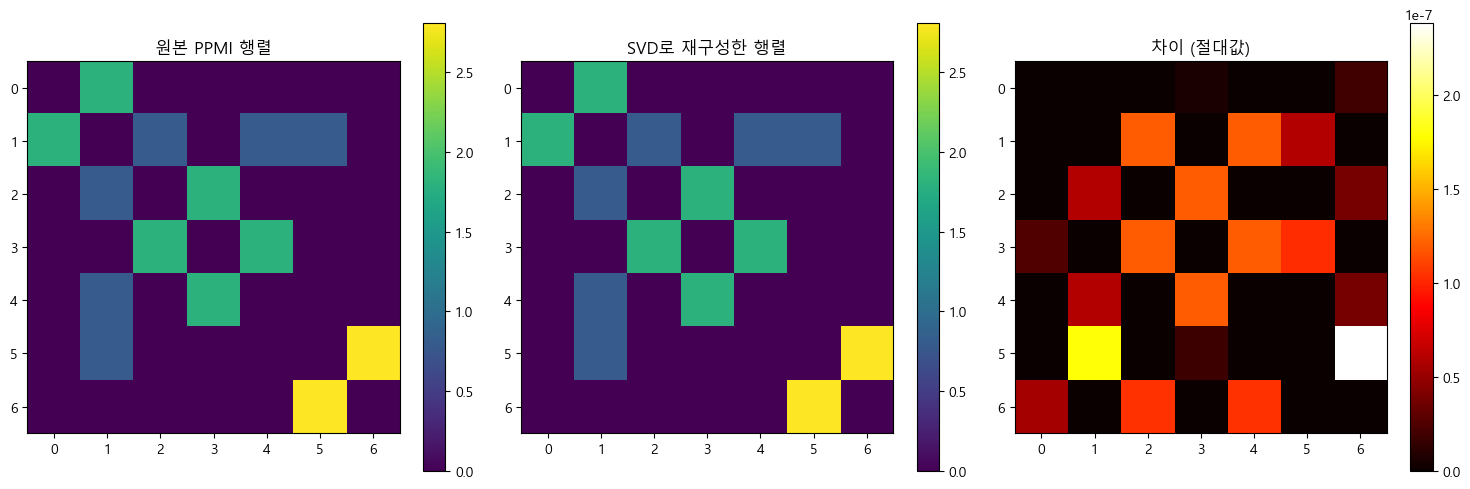

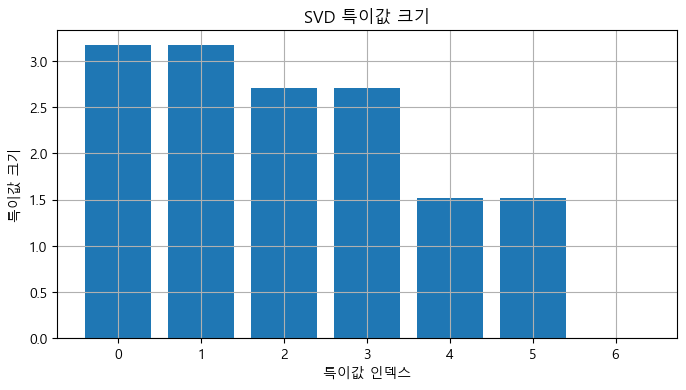

In [ ]:
import matplotlib.pyplot as plt
# 예시 텍스트
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)

# 동시발생 행렬 생성
C = create_co_matrix(corpus, vocab_size)
print("동시발생 행렬")
print(C)
print('-'*50)

# PPMI 행렬 계산
W = ppmi(C)
print('원본 PPMI 행렬')
print(W)
print('-'*50)

# SVD 적용 (차원 축소 없이)
print('SVD 분해 및 재구성')
U, S, V = np.linalg.svd(W)

# SVD로 원본 행렬 재구성 (차원 축소 없음)
# 방법 1: 대각 행렬 사용
S_diag = np.diag(S)
print('-'*50)
print(f"S_diag : \n {S_diag}")
reconstructed1 = U @ S_diag @ V
#reconstructed1 = np.matmul(np.matmul(U, S_diag), V)

# 방법 2: 브로드캐스팅 사용
reconstructed2 = U @ (S[:, np.newaxis] * V)
# reconstructed2 = np.matmul(
#     U, 
#     np.multiply(
#         S[:, np.newaxis], 
#         V
#     )
# )


print('-'*50)
print('SVD로 재구성한 PPMI 행렬 (방법 1)')
print(np.round(reconstructed1, 3))

# 원본과 재구성된 행렬 비교
print('-'*50)
print('원본 PPMI와 재구성된 행렬의 차이 (절대값)')
diff = np.abs(W - reconstructed1)
print(np.round(diff, 6))

# 전체 차이의 합계
total_diff = np.sum(diff)
print(f'전체 차이의 합: {total_diff:.10f}')

# 시각화를 위한 히트맵 비교
plt.figure(figsize=(15, 5))
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.subplot(1, 3, 1)
plt.title('원본 PPMI 행렬')
plt.imshow(W, cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('SVD로 재구성한 행렬')
plt.imshow(reconstructed1, cmap='viridis')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('차이 (절대값)')
plt.imshow(diff, cmap='hot')
plt.colorbar()

plt.tight_layout()
plt.show()

# SVD의 특이값 시각화
plt.figure(figsize=(8, 4))
plt.bar(range(len(S)), S)
plt.title('SVD 특이값 크기')
plt.xlabel('특이값 인덱스')
plt.ylabel('특이값 크기')
plt.grid(True)
plt.show()